<div style="text-align:center"><span style="color:#170D5D; font-family:Georgia; font-size:2.1em; LINE-HEIGHT:40px"> Programa de Modelación Matemática para el Desarrollo de Planes y Proyectos de Negocio II </span></div>

<br />
<br />
<b> <p style = "font-family: Palatino; font-size:1.9em; color: #090337;" > Notas técnicas </p> <b/>
<br />
 
<img style="float: right; margin: auto;" src="archivos/logo.jpg"  width="300px" />
 
><b> <p style = "font-family: Palatino; font-size:1.7em; color: #858489;" > Métrica Precios </p> <b/>
><br />
>    
><b> <p style = "font-family: Palatino; font-size:1.1em; color: #343437;" > Proyecto: Urban Lab </p> <b/>
><br />
>    
><b> <p style = "font-family: Palatino; font-size:1.0em; color: #090337;" > - Última Modificación: Junio 2020 </p><b/>
<br />


__________________
<br />

<span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Problema </span> 

> <div style="text-align: justify; font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> El contexto de la pandemia ha provocado que los mercados se encuentren en una situación de incertidumbre misma que afecta las decisiones de los agentes económicos ya sea consumidores, empresas, propietarios, inversores etc., que operan en los mercados. Debido a la situación de la pandemia, muchos precios comenzaron a aumentar o disminuir, lo que posicionó a las empresas en una situación completamente desconocida y sin un plan o estrategias de lo que podrían hacer.
<br />
<br />   
Se tomó en cuenta la variable de precios en la industria debido a la evolución que estos tuvieron y siguen teniendo a lo largo de la pandemia, ya que se sabe que gracias a esta situación hubo una alteración y afectación en las industrias en todos los sentidos, desde producción, mano de obra, precios etc. Como se mencionó antes, toda esta situación causó una incertidumbre en los sectores afectados.
<br />
<br />
En gran parte esto se debe a la oferta y la demanda, el término de demanda se refiere a la cantidad de bienes o servicios que los consumidores están dispuestos a pagar y la oferta es el conjunto de bienes y servicios que se ofrecen en el mercado con un precio en concreto, cabe mencionar que los precios están dados por la oferta y la demanda. </div>



__________________
<br />

<span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Criterio de Construcción de Variable </span> 

> <div style="text-align: justify; font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> El objetivo principal al que se quería llegar con esta variable era realizar una estimación de precios a futuro, que le puedan dar a los usuarios más certeza en su toma de decisiones, y más conocimiento de los precio en su sector o en el medio en que se desenvuelven. 
<br />
<br />   
Para la realización de esta variable lo primero que se hizo fue obtener la base de datos del INEGI de precios promedios, en la que se mostraban los precios de productos específicos así como la clase y el grupo al que pertenecen. 
<br />
<br />
Se utilizó un periodo de dos años de los datos obtenidos para la estimación del precio a futuro.
<br />
<br />
Por el tipo de series de tiempo que se presentaron decidimos hacer la estimación de precios por productos, y no por grupo como se había pensado en un principio.
<br />
<br />
<span style="color:#A9BCF5; font-family:Georgia; font-size:1.2em;"> Box-Jenkins Method </span> 
<br />
La estimación se realizó por medio de regresiones lineales en series de tiempos "sencillas" y las demás se realizaron por medio de la metodología Box-Jenkins.
<br />
<br />
Las tres etapas del modelado iterativo son las siguientes:
<br />
<br />
 1. Identificación y selección del modelo: asegurarse de que las variables son estacionarias, la identificación de la estacionalidad de la serie dependiente (diferenciación estacional, para cierto período, si es necesario), y el uso de los gráficos de las funciones de autocorrelación y de autocorrelación parcial de la serie de tiempo se utilizan para decidir cuál componente (si es el caso) se debe utilizar en el modelo, el promedio autorregresivo (AR) o un promedio móvil (MA).
<br />
<br />
2. Estimación de parámetros usando algoritmos de cálculo para tener coeficientes que mejor ajusten el modelo ARIMA seleccionado. Los métodos más comunes usan estimación de máxima verosimilitud o mínimos cuadrados no lineales.
<br />
<br />
 3. Comprobar el modelo mediante el ensayo, si el modelo estimado se ajusta a las especificaciones de un proceso univariado estacionario. En particular, los residuos deben ser independientes el uno del otro, además, la media y la varianza deben ser constantes en el tiempo. (Para identificar los errores de especificación son útiles la graficación de la media y la varianza de los residuos a través del tiempo y la realización de una prueba de Ljung-Box o bien por medio del trazado de autocorrelación y autocorrelación parcial de los residuos.)
<br />
<br />
Finalmente se realizó la estimación de los precios a Noviembre de 2020. 
</div>



In [1]:
import numpy as np
from statsmodels.tsa.stattools import  adfuller, pacf,acf
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf, pacf, acf
from sklearn.metrics import r2_score
from sklearn import linear_model
from functions_precios import semaforo_precios

Leer base de datos

In [2]:
# Leer datos
df_prices_or = pd.read_excel('archivos/Precios_INEGI.xlsx', sheet_name='Datos_acomodados')

#df_prices_or.head()

Acomodo de base de datos

In [3]:
# Hacer copia
df_p = df_prices_or.copy()

# Quitar numeros innecesarios
def col_no_numb(df):
    # De las columnas
    col_n = ['División', 'Grupo', 'Clase']
    # Quitar numeros
    no_numb = [df[i].str.replace('\d+', '') for i in col_n]
    # Quitar punto y espacio inicial
    for i in range(len(col_n)):
        point = ['. ', '.. ', '... ']
        df[col_n[i]] = no_numb[i].str.replace(point[i], '', regex=False)
    return df

df_np = col_no_numb(df_p)

# Nombre de todas las columnas con precios acomodadas correctamente
col_df = list(df_np.columns)[::-1][0:22]

# Merge ciertas columnas de original con las diferencias
df_prices = pd.merge(
    df_np[['División', 'Grupo', 'Clase', 'Generico', 'Especificación']], 
    df_np[col_df].iloc[:,1:], 
    left_index=True, right_index=True)

#df_prices.head()

Se tienen agrupados por diferentes aspectos: Division, Grupo, Clase, Generico y Especificación

In [4]:
df_prices.columns

Index(['División', 'Grupo', 'Clase', 'Generico', 'Especificación', 'sep 2018',
       'oct 2018', 'nov 2018', 'dic 2018', 'ene 2019', 'feb 2019', 'mar 2019',
       'abr 2019', 'may 2019', 'jun 2019', 'jul 2019', 'ago 2019', 'sep 2019',
       'oct 2019', 'nov 2019', 'dic 2019', 'ene 2020', 'feb 2020', 'mar 2020',
       'abr 2020', 'may 2020'],
      dtype='object')

Se tienen 2559 productos con sus respectivos precios desde septiembre 2018, es decir todas estas series de tiempo son por producto, sin embargo se decidió hacerlo por la mediana del generico (todos los arroces, todas las galletas, etc)

In [5]:
len(df_prices)

2559

De esta manera se tendrán 268 series de tiempo en vez de 2559 y se podrá analizar cada una sin que tarde tanto el código

In [6]:
len(df_prices.groupby('Generico'))

268

Lista con todas las clases, ya que cada clase de productos tendrá sus propias series de tiempos, de acuerdo al nombre generico de los productos

In [7]:
clases = df_prices['Clase'].unique()
clases

array(['Pan, tortillas y cereales', 'Carnes', 'Pescados y mariscos',
       'Leche, derivados de leche y huevo',
       'Aceites y grasas comestibles', 'Frutas y hortalizas',
       'Otros alimentos', 'Azúcar, café y refrescos envasados',
       'Bebidas alcohólicas', 'Tabaco', 'Ropa mujer', 'Ropa hombre',
       'Ropa para niños y bebés', 'Ropa de abrigo y uniformes escolares',
       'Cuidados del vestido y accesorios', 'Calzado',
       'Costo de uso de vivienda',
       'Otros servicios relacionados con la vivienda',
       'Electricidad y combustibles', 'Muebles', 'Aparatos',
       'Accesorios y utensilios', 'Detergentes y productos similares',
       'Artículos para higiene y cuidado personal',
       'Medicamentos y aparatos', 'Servicios médicos',
       'Adquisición de vehículos', 'Uso de vehículos',
       'Transporte público urbano', 'Transporte público foráneo',
       'Otros servicios', 'Servicios para el cuidado personal'],
      dtype=object)

Para hacer el analisis se separan las series de tiempo de acuerdo de la clase por la mediana del generico

In [8]:
def f_time_series(p_df_prices, p_clase):
    # Agrupar por clase
    clases = list(p_df_prices.groupby('Clase'))
    
    # Busqueda de dataframe para la clase que se necesita
    search = [clases[i][1] for i in range(len(clases)) if clases[i][0]==p_clase][0]
    search.reset_index(inplace=True, drop=True)

    # Agrupar por generico
    generico = list(search.groupby('Generico'))

    # Series de tiempo por Generico
    series_tiempo = [generico[i][1].median().rename(generico[i][0], 
                             inplace=True) for i in range(len(generico))]

    return series_tiempo

In [9]:
series_tiempo = f_time_series(df_prices, clases[1])
len(series_tiempo)

10

Podemos decir que hay 10 productos en 'Leche, derivados de leche y huevo'.


### Tomar una serie de tiempo


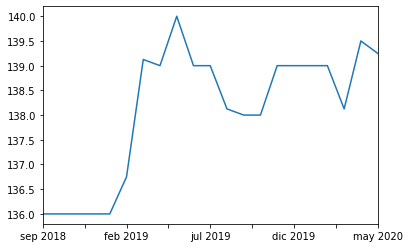

In [10]:
serie_tiempo_1 = series_tiempo[1]

serie_tiempo_1.plot()

Primero se intenta ajustar con una regresion lineal, y si se ajusta un 95% se predice con eso, ya que sucede que se encontraron series de tiempo en las cuales no cambian el precio a través del tiempo, y con esto no se puede ajustar un sarima

In [20]:
y_o = np.array(serie_tiempo_1)
x_o = np.arange(len(serie_tiempo_1))

# Acomodarla de la forma que el modelo necesita
x = x_o.reshape((len(x_o), 1))
y = y_o.reshape((len(y_o), 1))

# Crear el modelo
modelo = linear_model.LinearRegression()

# Pasar nuestros datos por el modelo
modelo.fit(x, y)

# De acuerdo al modelo, calcular y
y_pred = modelo.predict(x)

# R2 de sus residuales
r_2 = r2_score(y, y_pred)
r_2

0.5228214173637338

No tiene un buen ajuste asi que se buscar modelar la serie de tiempo con un ARIMA

<span style="color:#516D6E; font-family:Georgia; font-size:1.4em;"> Prueba de estacionariedad </span>

Una serie de tiempo es estacionaria cuando la media y la variabilidad se mantienen constantes a lo largo del tiempo, es decir, no es en función del tiempo; y además, no presenta tendencia

-----

<span style="color:#29AECE; font-family:Georgia; font-size:1.2em;"> Prueba de  Dicky-Fuller aumentada </span> - [LINK]('https://es.wikipedia.org/wiki/Prueba_de_Dickey-Fuller_aumentada')

En estadística y econometría, una prueba de Dickey-Fuller aumentada (ADF) es una prueba de raíz unitaria para una muestra de una serie de tiempo. Es una versión aumentada de la prueba Dickey-Fuller para un conjunto más amplio y más complejo de modelos de series de tiempo. La estadística Dickey-Fuller Aumentada (ADF), utilizada en la prueba, es un número negativo. Cuanto más negativo es, más fuerte es el rechazo de la hipótesis nula de que existe una raíz unitaria para un cierto nivel de confianza

>Ho: No es estacionaria (tiene unit-root)
>
>Hi: Es estacionaria (No tiene raiz unitaria)

Aceptar Ho si: 
p_value > 0.05


In [11]:
def check_stationarity_t(data):
    
    # Usar dicky fuller
    test_results = adfuller(data)
    
    # Cuando se cumple esto es estacionaria la serie orginal
    if test_results[0] < 0 and test_results[1] <= 0.05:
        lags = 0
        new_data = data
        
    # Cuando no se cumple se debe diferenciar para que sea estacionaria
    else:
        for i in range(3):
            
            # Diferenciar datos
            new_data = data.diff().dropna()
            
            # Volver a calcular test dicky fuller
            new_results = adfuller(new_data)
            
            # Volver a comparar para decidir si es o no estacionaria
            if new_results[0] < 0 and new_results[1] <= 0.05:
                #print('es estacionaria')
                lags = i
                break
            
            else:
                data = new_data
                #print('no es estacionaria')
                lags = np.nan
                
    # Regresa los datos diferenciados que son estacionarios
    return lags

# Todas las series de tiempo estacionarias
d = check_stationarity_t(serie_tiempo_1)
d

0

____
<span style="color:#29AECE; font-family:Georgia; font-size:1.2em;"> FAC y FAC Parcial </span>

En el caso de la autocorrelación parcial, nos indica el grado de correlación que exite entre la observaciones de un variable y cada uno de sus rezagos, consdierando rezagos intermedios. 

En el caso de la autocorrelación, esta función nos indica el grado de correlación que existe entre una observación de una variable con cada uno de sus rezagos, habiendo eliminado cualquier dependencia linear con los rezagos intermedios.

**[FAC - grafica]('https://www.xlstat.com/es/soluciones/funciones/analisis-descriptivo-de-series-temporales')**

To give an idea of the degree of dependence between the values of a time series. The visualization of the ACF or of the partial autocorrelation function (PACF) helps to identify the suitable models to explain the past observations and to do predictions. The theory shows that the PACF function of an AR(p) – an autoregressive process of order p - is zero for lags greater than p.

In [12]:

def g_PQ(data):
    plt.figure(1,figsize=(10,8))
    plot_acf(data)
    plot_pacf(data)
    plt.show()


<Figure size 720x576 with 0 Axes>

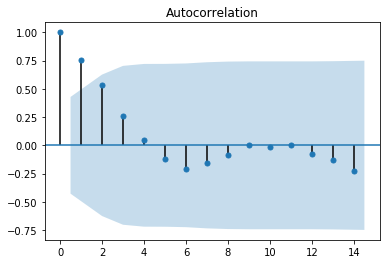

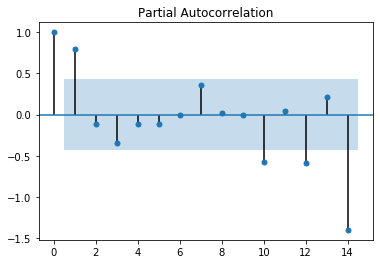

In [13]:
g_PQ(serie_tiempo_1)
#g_PQ(series_tiempo[s])

In [14]:


# lambda para tomar los coef significativos
all_significant_coef = lambda x: x if abs(x) > 0.5 else None

def significat_lag(all_coef):
    # Tomar los indices de los rezagos
    ind_c = all_coef.index.values
    # Solo los rezagos menores a 7
    sig_i = ind_c[ind_c < 7]
    # Nuevos coeficientes
    new_coef = all_coef[all_coef.index.isin(list(sig_i))]
    if len(new_coef) > 1:
        # Tomar los valores absolutos
        abs_coef = new_coef[1:].abs()
        # Buscar el maximo
        max_coef = abs_coef.max()
        # El indice es el rezago al que pertenece
        answer = abs_coef[abs_coef == max_coef[0]].dropna().index[0]
        return answer
    else:
        return 1

# Calcular coeficientes de fac parcial
facp = sm.tsa.stattools.pacf(serie_tiempo_1)

# Pasar lambda y quitar los que no son significativos
p_s = pd.DataFrame(all_significant_coef(facp[i]) for i in range(len(facp))).dropna()

# Tomar el primero que sea signiticativo, sera la p de nuestro modelo
p = significat_lag(p_s)

# --- #

# Calcular coeficientes de fac
fac = sm.tsa.stattools.acf(serie_tiempo_1, fft=False)

# Pasar lambda y quitar los que no son significativos
q_s = pd.DataFrame(all_significant_coef(fac[i]) for i in range(len(fac))).dropna()

# Tomar el primero que sea signiticativo, sera la p de nuestro modelo
q = significat_lag(q_s)

print(p, q)

1 1


‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.


**ARIMA model in words:**


Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

In [15]:

def fit_arima(data, p, q, d):
    serie_tiempo = data.copy()
    serie_tiempo.reset_index(drop=True, inplace=True)
    arima = sm.tsa.statespace.SARIMAX(serie_tiempo,
                                              order=(p, d, q),
                                              trend='c',
                                              enforce_stationarity=True,
                                              enforce_invertibility=True)
    model_fit = arima.fit(disp=0)
    return model_fit

arima = fit_arima(serie_tiempo_1, p, q, d)

In [16]:
residuals = arima.resid


### Residuales

<span style="color:#516D6E; font-family:Georgia; font-size:1.4em;"> Prueba de Shapiro-Wilk  </span>  **Normalidad**

Esta prueba es una de las muchas pruebas que permiten estimar si una variable sigue una distribución normal o no. Para esta prueba tenemos el siguiente conjunto de hipotesis :

$H_0$: la muestra evaluada proviene de una población normal, tal que $x_t \thicksim (\mu,\sigma^2)$ 

$H_a$: la muestra evaluada no proviene de una población normal.

____________________

<span style="color:#516D6E; font-family:Georgia; font-size:1.4em;"> Prueba Arch  </span>   **Heterocedasticidad**


Es importante conocer si una serie de tiempo es heterocedástica ya que, por ejemplo, si dicha serie de tiempo presentase esta propiedad, un modelo ARIMA no sería una buena propueta para intentar describir y pronosticar el comportamiento de la varible estudiada.  

Para detectar esto, procederemos a utilizar la prueba ARCH (autoregressive conditional heteroskedasticity) con los datos a los que les fue aplicada una diferencia. Para efectos de la prueba, consideraremos, como en el caso de la prueba de estacionariedad, un ${\alpha}=0.05$.

__________________

<span style="color:#516D6E; font-family:Georgia; font-size:1.4em;"> Ljung‐Box   </span>    **Colinealidad**

Para examinar las series de datos en busca de evidencia de cualquier correlación serial usamos la prueba estadística Ljung‐Box y las estadísticas modificadas 
.

La prueba Ljung‐Box:

Donde:

H0: Hipótesis Nula  (ruido blanco)

H1: Hipótesis alternativa (no ruido blanco)

m: Límite de retraso superior de la prueba. El límite de retraso superior puede o ser establecido por nosotros o dejado allí para que la función elija un límite apropiado. Los profesionales usan  como un valor apropiado para



In [17]:
def check_resid(model_fit):
    # estadístico Ljung – Box.
    colineal = acorr_ljungbox(model_fit.resid, lags=[10])
    
    # shapiro test
    normalidad = shapiro(model_fit.resid)

    # arch test
    heterosced = het_arch(model_fit.resid)
    
    return colineal, normalidad, heterosced

ans = check_resid(arima)

### Predicción

In [18]:
future_prices = arima.forecast(6, alpha=0.05)
prediction = future_prices.iloc[-1]

ultimo_precio = serie_tiempo_1[len(serie_tiempo_1) - 1]

cambio_porc = (ultimo_precio - prediction)/ultimo_precio

cambio_porc

0.008027414178078987

__________________
<br />

<span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Resultados </span> 


EL ultimo precio y la prediccion para noviembre 2020

In [19]:
# De todas las series de tiempo de todas las clases
semaforo = semaforo_precios(df_prices)

# Predicciones
predicciones = semaforo['predicciones']
predicciones

Ultimo precio  \
Accesorios y artículos de limpieza para el hogar Accesorios y utensilios                              111.50   
                                                 Detergentes y productos similares                     36.14   
Accesorios y cuidados del vestido                Cuidados del vestido y accesorios                    228.00   
Alimentos                                        Pan, tortillas y cereales                             33.44   
                                                 Carnes                                                92.94   
                                                 Pescados y mariscos                                  160.00   
                                                 Leche, derivados de leche y huevo                     77.00   
                                                 Aceites y grasas comestibles                          31.05   
                                                 Frutas y hortalizas                                   28.53   
                                                 Otros alimentos                                      102.57   
                                                 Azúcar, café y refrescos envasados                    22.35   
Bebidas alcohólicas y tabaco                     Bebidas alcohólicas                                  226.64   
                                                 Tabaco                                                63.00   
Calzado                                          Calzado                                              500.65   
Costo de uso de vivienda                         Costo de uso de vivienda                             480.69   
Cuidado personal                                 Artículos para higiene y cuidado personal             43.86   
                                                 Servicios para el cuidado personal                   202.50   
Electricidad y combustibles                      Electricidad y combustibles                          149.45   
Muebles y aparatos domésticos                    Muebles                                             6249.38   
                                                 Aparatos                                            1493.98   
Otros servicios                                  Otros servicios                                      112.50   
Otros servicios relacionados con la vivienda     Otros servicios relacionados con la vivienda         250.00   
Ropa                                             Ropa mujer                                           202.22   
                                                 Ropa hombre                                          279.00   
                                                 Ropa para niños y bebés                               89.00   
                                                 Ropa de abrigo y uniformes escolares                 498.27   
Salud                                            Medicamentos y aparatos                              159.00   
                                                 Servicios médicos                                    750.00   
Transporte por cuenta propia                     Adquisición de vehículos                           42999.00   
                                                 Uso de vehículos                                     540.50   
Transporte público                               Transporte público urbano                              9.50   
                                                 Transporte público foráneo                           807.00   

                                                                                               Precio para Nov 2020  
Accesorios y artículos de limpieza para el hogar Accesorios y utensilios                                   112.9826  
                                                 Detergentes y productos similares                          37.1843  
Accesorios y cuidados del vestido           

__________________
<br />

<span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Referencias </span> 

- [Adfuller]('https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html')

- [Ljung‐Box]('https://support.numxl.com/hc/es/articles/115001099806--C%C3%B3mo-comprobar-cu%C3%A1ndo-una-serie-de-tiempo-dada-es-s%C3%B3lo-ruido-blanco-') 